In [1]:
##IMPORTS
#Basics
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os # create directories in the local filesystem
from tqdm import tqdm # plot progress bars
import plotly.express as px

#PyTorch
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import  DataLoader
from torch import nn


import torch.optim as optim
import torch.nn.functional as F

#Pytoprch lightning


#For Optuna (Hyperparameters search)
import optuna
from optuna.integration import PyTorchLightningPruningCallback

#Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# For latent space exploration
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Models definitions and training models
import model


C:\Users\hilar\anaconda3\envs\NNDL_torch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Set seeds for reproducibility (PyTorch, Python, Numpy)
matricola = 2013031
torch.manual_seed(matricola)
random.seed(matricola)
np.random.seed(matricola)


# Import the data

In [3]:
### Download the data and create dataset
data_dir = 'dataset'
# With these commands the train and test datasets, respectively, are downloaded 
# automatically and stored in the local "data_dir" directory.
train_dataset = torchvision.datasets.FashionMNIST(data_dir, train=True, download=False)
test_dataset  = torchvision.datasets.FashionMNIST(data_dir, train=False, download=False)


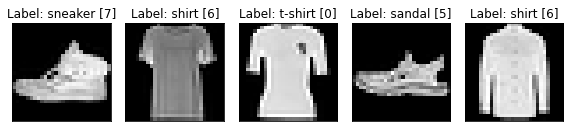

In [4]:
### Plot some sample
label_names=['t-shirt','trouser','pullover','dress','coat','sandal','shirt',
             'sneaker','bag','boot']
fig, axs = plt.subplots(1, 5, figsize=(8,8))
for ax in axs.flatten():
    # random.choice allows to randomly sample from a list-like object (basically anything that can be accessed with an index, like our dataset)
    img, label = random.choice(train_dataset)
    ax.imshow(np.array(img), cmap='gist_gray')
    ax.set_title(f'Label: {label_names[label]} [{label}]')
    ax.set_xticks([])
    ax.set_yticks([])
plt.savefig('./Img/clothe_samples.svg', format='svg')
plt.tight_layout()

In [5]:
# In this case the train_transform and test_transform are the same, 
# but we keep them separate for potential future updates
train_transform = transforms.Compose([
    transforms.ToTensor(),
])
test_transform = transforms.Compose([
    transforms.ToTensor(),
])

# Set the train transform
train_dataset.transform = train_transform
# Set the test transform
test_dataset.transform = test_transform

### Define train dataloader
train_dataloader = DataLoader(train_dataset, batch_size=256, shuffle=True)
### Define test dataloader
test_dataloader = DataLoader(test_dataset, batch_size=256, shuffle=False)

In [6]:
batch_data, batch_labels = next(iter(train_dataloader))
print(f"TRAIN BATCH SHAPE")
print(f"\t Data: {batch_data.shape}")
print(f"\t Labels: {batch_labels.shape}")

batch_data, batch_labels = next(iter(test_dataloader))
print(f"TEST BATCH SHAPE")
print(f"\t Data: {batch_data.shape}")
print(f"\t Labels: {batch_labels.shape}")

TRAIN BATCH SHAPE
	 Data: torch.Size([256, 1, 28, 28])
	 Labels: torch.Size([256])
TEST BATCH SHAPE
	 Data: torch.Size([256, 1, 28, 28])
	 Labels: torch.Size([256])


# Implement autoencoder

**2 pt - Implement and test (convolutional) autoencoder, reporting the trend of reconstruction loss and some examples of image reconstruction; explore advanced optimizers and regularization methods**


In [7]:
encoded_space_dim = 2
max_epochs        = 10
learning_rate     = 1e-3
regularization    = 0.


In [8]:
# Initialize the autoencoder
AE = model.Autoencoder(encoded_space_dim)


In [9]:
### Define the loss function for reconstruction
loss_fn = nn.MSELoss()

### Define an optimizer (both for the encoder and the decoder!)
params_to_optimize = [
    {'params': AE.encoder.parameters()},
    {'params': AE.decoder.parameters()}
]
optim = torch.optim.Adam(params_to_optimize, lr=learning_rate, weight_decay=regularization)

# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

#Send model to device
AE.to(device)


Selected device: cpu


Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (5): ReLU(inplace=True)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=288, out_features=64, bias=True)
    (8): ReLU(inplace=True)
    (9): Linear(in_features=64, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=64, out_features=288, bias=True)
    (3): ReLU(inplace=True)
    (4): Unflatten(dim=1, unflattened_size=(32, 3, 3))
    (5): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2))
    (6): ReLU(inplace=True)
    (7): ConvTranspose2d(16, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (8): ReLU(inplac

  0%|          | 0/10 [00:00<?, ?it/s]

EPOCH 1/10
AVERAGE TRAIN LOSS: 0.09352531284093857
AVERAGE TEST LOSS: 0.04421302676200867


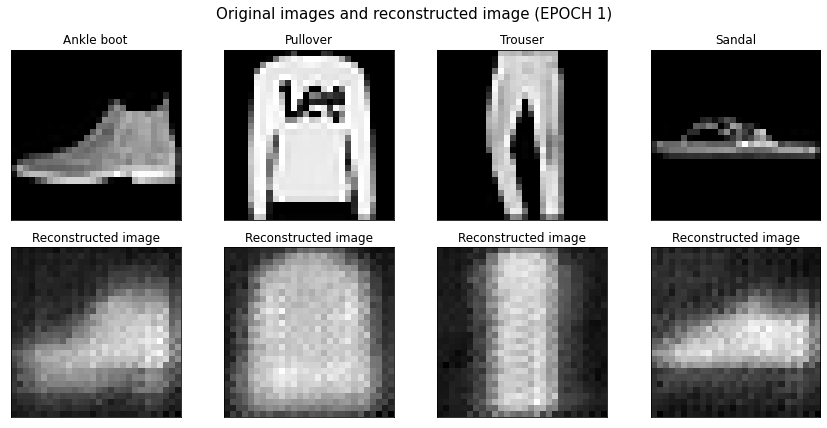

 10%|█         | 1/10 [00:25<03:47, 25.22s/it]

EPOCH 2/10
AVERAGE TRAIN LOSS: 0.0408201739192009


 20%|██        | 2/10 [00:49<03:18, 24.82s/it]

AVERAGE TEST LOSS: 0.038555633276700974
EPOCH 3/10
AVERAGE TRAIN LOSS: 0.03699951991438866


 30%|███       | 3/10 [01:14<02:54, 24.89s/it]

AVERAGE TEST LOSS: 0.03600844740867615
EPOCH 4/10
AVERAGE TRAIN LOSS: 0.03513478860259056


 40%|████      | 4/10 [01:38<02:27, 24.52s/it]

AVERAGE TEST LOSS: 0.03471613675355911
EPOCH 5/10
AVERAGE TRAIN LOSS: 0.034103889018297195


 50%|█████     | 5/10 [02:02<02:01, 24.21s/it]

AVERAGE TEST LOSS: 0.03409736976027489
EPOCH 6/10
AVERAGE TRAIN LOSS: 0.0333879292011261
AVERAGE TEST LOSS: 0.03327097371220589


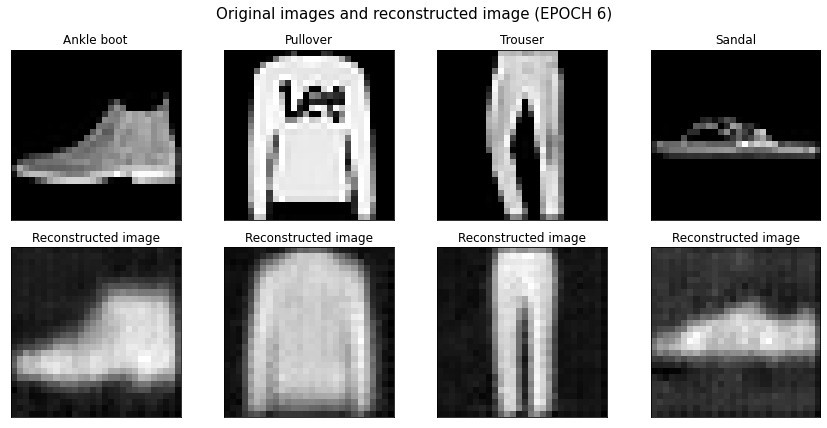

 60%|██████    | 6/10 [02:28<01:38, 24.74s/it]

EPOCH 7/10
AVERAGE TRAIN LOSS: 0.03276354819536209


 70%|███████   | 7/10 [02:52<01:14, 24.77s/it]

AVERAGE TEST LOSS: 0.032610319554805756
EPOCH 8/10
AVERAGE TRAIN LOSS: 0.03211339935660362


 80%|████████  | 8/10 [03:18<00:49, 24.95s/it]

AVERAGE TEST LOSS: 0.03195946663618088
EPOCH 9/10
AVERAGE TRAIN LOSS: 0.0316300243139267


 90%|█████████ | 9/10 [03:42<00:24, 24.72s/it]

AVERAGE TEST LOSS: 0.03170430660247803
EPOCH 10/10
AVERAGE TRAIN LOSS: 0.031196417286992073


100%|██████████| 10/10 [04:07<00:00, 24.75s/it]

AVERAGE TEST LOSS: 0.031180649995803833


In [10]:
train_loss, test_loss = AE.training_cycle(device,
                                train_dataloader,
                                test_dataloader,
                                loss_fn,
                                optim,
                                max_epochs,
                                test_dataset,
                                encoded_space_dim,
                                plot = True,
                                keep_plots = False,
                                keep_model=False,
                                verbose=True)

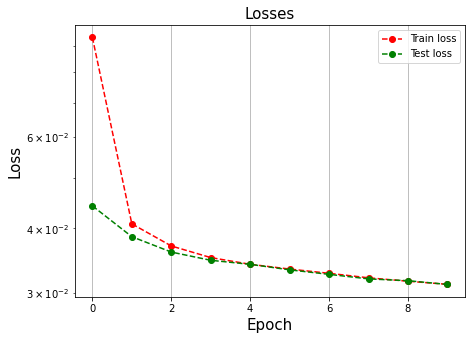

In [11]:
# Plot losses by epoch
plt.figure(figsize=(7,5))
plt.semilogy(train_loss, linestyle='--', marker='o', color='r', label='Train loss')
plt.semilogy(test_loss, linestyle='--', marker='o', color='g', label='Test loss')
plt.xlabel('Epoch',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.title("Losses",fontsize=15)
plt.grid()
plt.legend()
#plt.savefig('./imgs/classification/losses.svg', format='svg')
plt.show()

# Optimize autoencoder parameters

**1 pt - optimize hyperparameters using grid/random search or automatic tuning tools (e.g., Optuna)**

In [7]:
# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')


Selected device: cpu


In [8]:
def objective(trial):
    max_epochs = 8
    
    # Parameters for the search
    encoded_space_dim      = trial.suggest_categorical("encoded_space_dim", [2,10])
    optimizer_name         = trial.suggest_categorical('optimizer_name',["SGD", "Adam"])
    lr                     = trial.suggest_loguniform("lr", 1e-5, 1e-1)
    regularization         = trial.suggest_loguniform("regularization", 1e-5, 1e-1)
    
    
    ### Initialize both network
    AE = model.Autoencoder(encoded_space_dim)
    AE.to(device)
 
    
    ### Define the loss function
    loss_fn = nn.MSELoss()
    
    
    #Define the optimizer
    optimizer = getattr(torch.optim,optimizer_name)(AE.parameters(), lr=lr, weight_decay=regularization)
    
    #The bad thing of this simple approach is that we only consider the last epoch test loss as the valid one.
    train, test = AE.training_cycle(device,
                                train_dataloader,
                                test_dataloader,
                                loss_fn,
                                optimizer,
                                max_epochs,
                                test_dataset,
                                encoded_space_dim,
                                plot       = False,
                                keep_plots = False,
                                keep_model =False,
                                verbose    =False)
 
    return test[-1]

In [9]:
#Define the study
study = optuna.create_study(study_name="no_pruning", direction="minimize")
study.optimize(objective, n_trials=200, timeout=21600) #6 hours

[I 2022-07-09 15:54:24,016] A new study created in memory with name: no_pruning
100%|██████████| 8/8 [02:04<00:00, 15.58s/it]
[I 2022-07-09 15:56:28,653] Trial 0 finished with value: 0.2611108422279358 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'SGD', 'lr': 0.00011017082348384097, 'regularization': 0.0013002176320888622}. Best is trial 0 with value: 0.2611108422279358.
100%|██████████| 8/8 [02:34<00:00, 19.30s/it]
[I 2022-07-09 15:59:03,022] Trial 1 finished with value: 0.12400879710912704 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'SGD', 'lr': 0.004175779714096861, 'regularization': 0.00019262508543429522}. Best is trial 1 with value: 0.12400879710912704.
100%|██████████| 8/8 [02:56<00:00, 22.12s/it]
[I 2022-07-09 16:01:59,993] Trial 2 finished with value: 0.0345282182097435 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'Adam', 'lr': 0.0019311499018602215, 'regularization': 0.00037902709118175473}. Best is trial 2 with value: 0.03452821820

100%|██████████| 8/8 [02:40<00:00, 20.11s/it]
[I 2022-07-09 17:17:17,640] Trial 25 finished with value: 0.03157341107726097 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'Adam', 'lr': 0.0007939847045185682, 'regularization': 1.1380289829103274e-05}. Best is trial 24 with value: 0.03048602119088173.
100%|██████████| 8/8 [02:38<00:00, 19.80s/it]
[I 2022-07-09 17:19:56,092] Trial 26 finished with value: 0.03326015546917915 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'Adam', 'lr': 0.00031052785162886574, 'regularization': 2.1889207937270904e-05}. Best is trial 24 with value: 0.03048602119088173.
100%|██████████| 8/8 [03:45<00:00, 28.14s/it]
[I 2022-07-09 17:23:41,242] Trial 27 finished with value: 0.03185436874628067 and parameters: {'encoded_space_dim': 2, 'optimizer_name': 'Adam', 'lr': 0.0012664514796004724, 'regularization': 8.592910577320889e-05}. Best is trial 24 with value: 0.03048602119088173.
100%|██████████| 8/8 [04:02<00:00, 30.27s/it]
[I 2022-07-09 1

100%|██████████| 8/8 [03:07<00:00, 23.47s/it]
[I 2022-07-09 18:43:51,521] Trial 51 finished with value: 0.02143748290836811 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0004706729683965269, 'regularization': 0.00011058634283366527}. Best is trial 46 with value: 0.020372461527585983.
100%|██████████| 8/8 [03:04<00:00, 23.11s/it]
[I 2022-07-09 18:46:56,433] Trial 52 finished with value: 0.02549847401678562 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.00052188243245301, 'regularization': 0.00031362883341734033}. Best is trial 46 with value: 0.020372461527585983.
100%|██████████| 8/8 [03:13<00:00, 24.24s/it]
[I 2022-07-09 18:50:10,358] Trial 53 finished with value: 0.02356691285967827 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.000547407183689754, 'regularization': 0.00032716659199042943}. Best is trial 46 with value: 0.020372461527585983.
100%|██████████| 8/8 [03:10<00:00, 23.81s/it]
[I 2022-07-0

100%|██████████| 8/8 [03:01<00:00, 22.74s/it]
[I 2022-07-09 20:03:50,702] Trial 76 finished with value: 0.1241140365600586 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'SGD', 'lr': 0.0015408069757126988, 'regularization': 3.103532080967368e-05}. Best is trial 74 with value: 0.01768914982676506.
100%|██████████| 8/8 [03:19<00:00, 24.91s/it]
[I 2022-07-09 20:07:09,998] Trial 77 finished with value: 0.01837894693017006 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.001427775819091605, 'regularization': 6.934040379680689e-05}. Best is trial 74 with value: 0.01768914982676506.
100%|██████████| 8/8 [03:23<00:00, 25.43s/it]
[I 2022-07-09 20:10:33,452] Trial 78 finished with value: 0.019124675542116165 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0014996464263727135, 'regularization': 7.33960388350588e-05}. Best is trial 74 with value: 0.01768914982676506.
100%|██████████| 8/8 [03:04<00:00, 23.09s/it]
[I 2022-07-09 20:1

100%|██████████| 8/8 [03:23<00:00, 25.43s/it]
[I 2022-07-09 21:29:24,579] Trial 101 finished with value: 0.01746867224574089 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0028394671326574714, 'regularization': 1.0079677573680234e-05}. Best is trial 95 with value: 0.016857486218214035.
100%|██████████| 8/8 [03:23<00:00, 25.48s/it]
[I 2022-07-09 21:32:48,433] Trial 102 finished with value: 0.018062617629766464 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.002515712617685194, 'regularization': 1.00837242506785e-05}. Best is trial 95 with value: 0.016857486218214035.
100%|██████████| 8/8 [02:57<00:00, 22.20s/it]
[I 2022-07-09 21:35:46,049] Trial 103 finished with value: 0.016948960721492767 and parameters: {'encoded_space_dim': 10, 'optimizer_name': 'Adam', 'lr': 0.0050806071254121425, 'regularization': 1.1580943448656664e-05}. Best is trial 95 with value: 0.016857486218214035.
100%|██████████| 8/8 [02:49<00:00, 21.19s/it]
[I 2022

In [10]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 110
Best trial:
  Value: 0.016857486218214035
  Params: 
    encoded_space_dim: 10
    optimizer_name: Adam
    lr: 0.0022456115707246787
    regularization: 1.323654840982853e-05


In [11]:
optuna.visualization.plot_param_importances(study)

In [12]:
optuna.visualization.plot_contour(study, params=['lr','encoded_space_dim'])

## Re train best model 

In [13]:
learning_rate       = trial.params['lr']
encoded_space_dim   = trial.params["encoded_space_dim"]
regularization_term = trial.params["regularization"]
n_epochs = 50 

In [14]:
AE = model.Autoencoder(encoded_space_dim)

In [15]:
### Define the loss function
loss_fn = nn.MSELoss()

### Define an optimizer (both for the encoder and the decoder!)
params_to_optimize = [
    {'params': AE.encoder.parameters()},
    {'params': AE.decoder.parameters()}
]
optim = torch.optim.Adam(params_to_optimize, lr=learning_rate, weight_decay=regularization_term)

# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

#Send model to device
AE.to(device)

Selected device: cpu


Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (5): ReLU(inplace=True)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=288, out_features=64, bias=True)
    (8): ReLU(inplace=True)
    (9): Linear(in_features=64, out_features=10, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=10, out_features=64, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=64, out_features=288, bias=True)
    (3): ReLU(inplace=True)
    (4): Unflatten(dim=1, unflattened_size=(32, 3, 3))
    (5): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2))
    (6): ReLU(inplace=True)
    (7): ConvTranspose2d(16, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (8): ReLU(inpl

  0%|          | 0/50 [00:00<?, ?it/s]

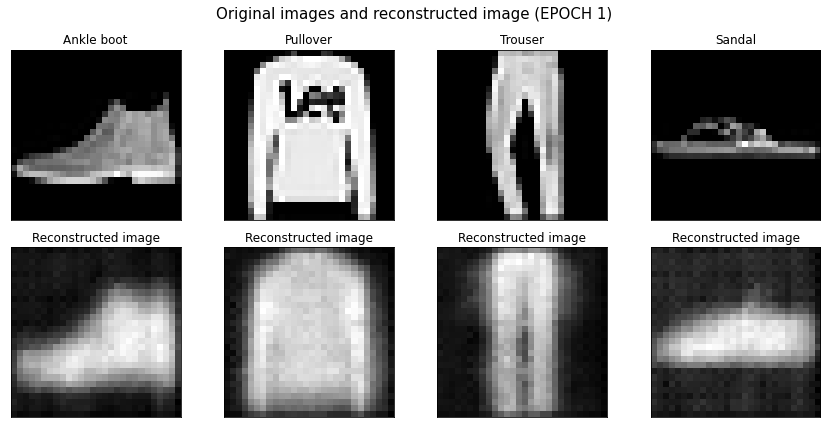

 10%|█         | 5/50 [02:15<20:27, 27.28s/it]

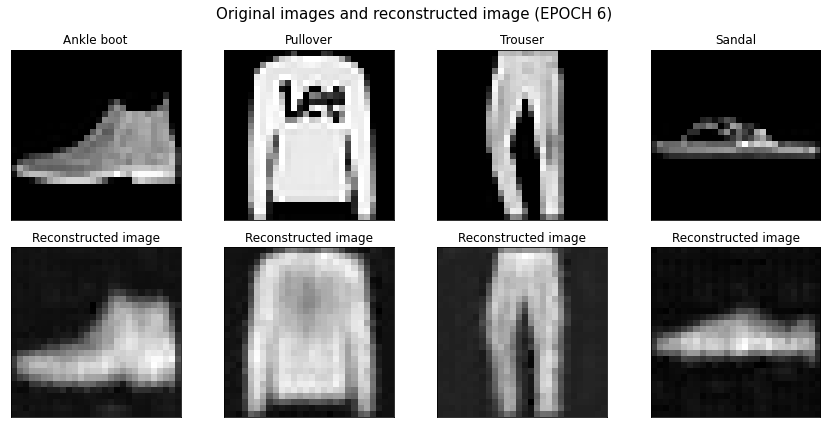

 20%|██        | 10/50 [04:56<20:58, 31.47s/it]

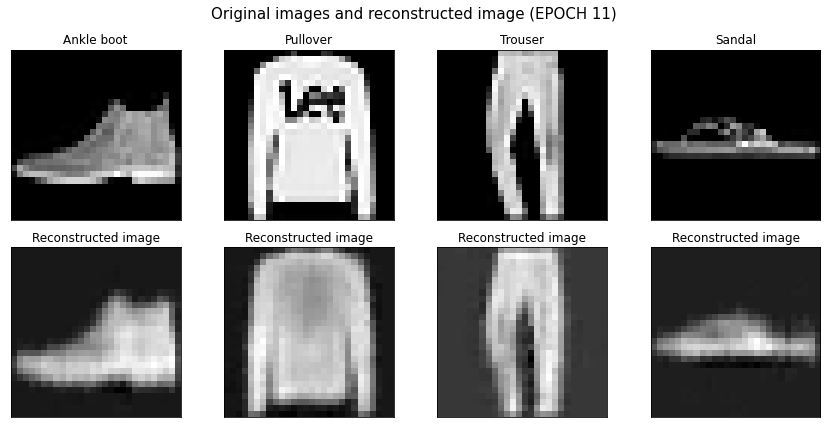

 30%|███       | 15/50 [07:47<19:10, 32.87s/it]

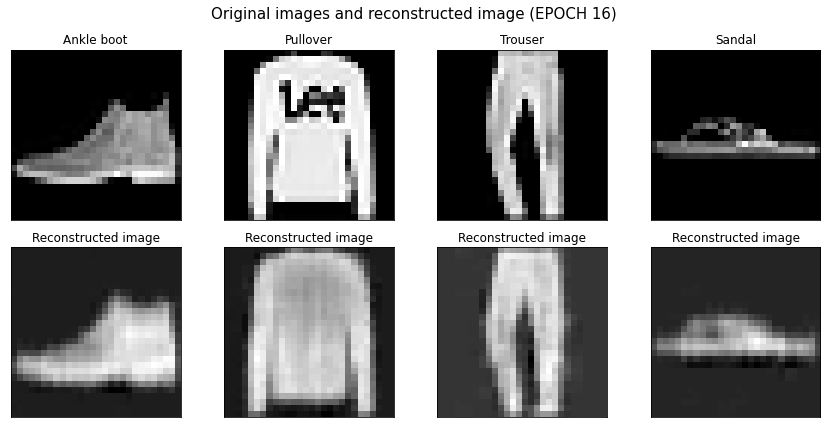

 40%|████      | 20/50 [10:23<15:56, 31.88s/it]

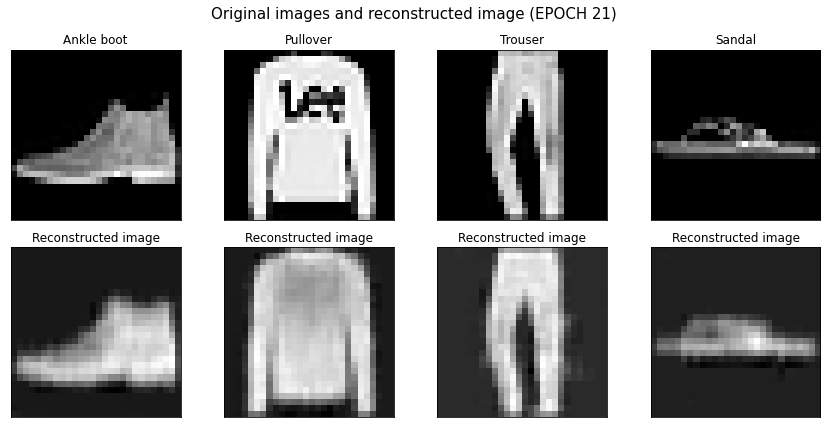

 50%|█████     | 25/50 [13:05<13:22, 32.09s/it]

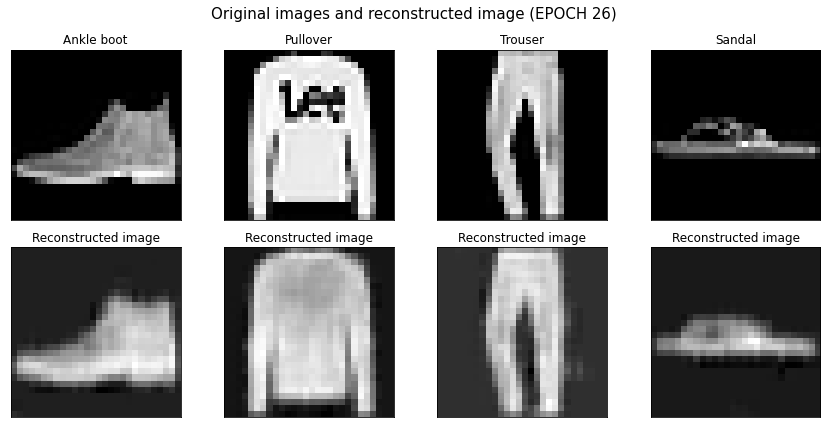

 60%|██████    | 30/50 [15:38<10:12, 30.64s/it]

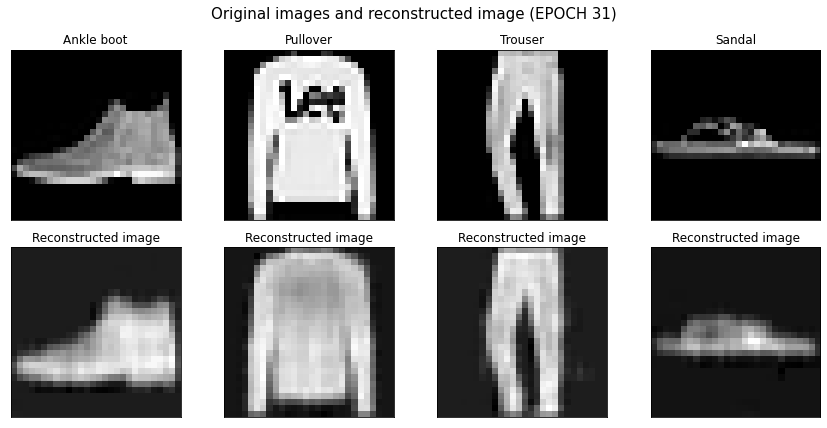

 70%|███████   | 35/50 [18:11<07:38, 30.56s/it]

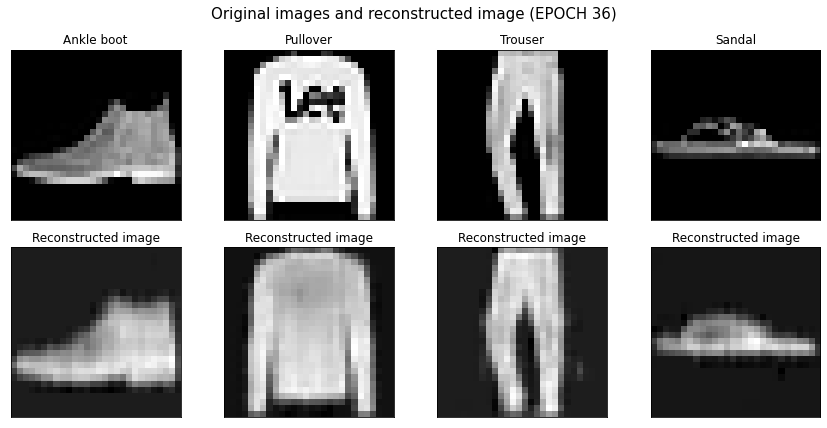

 80%|████████  | 40/50 [20:41<04:58, 29.89s/it]

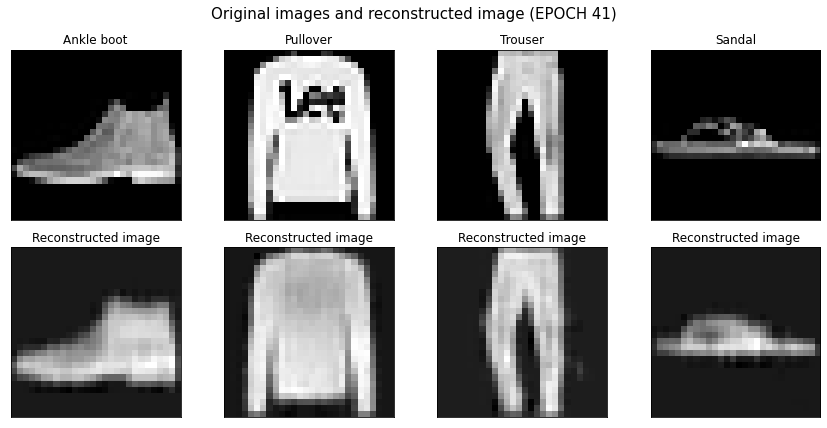

 90%|█████████ | 45/50 [23:24<02:42, 32.55s/it]

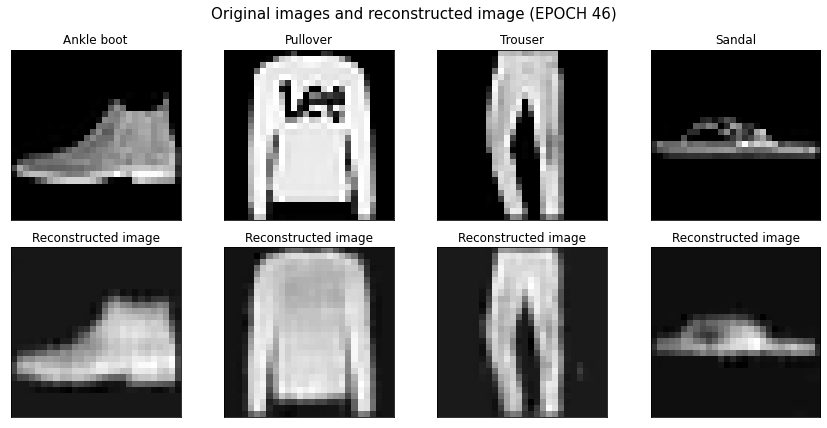

100%|██████████| 50/50 [26:16<00:00, 31.52s/it]


In [16]:
train_loss, test_loss = AE.training_cycle(device,
                                train_dataloader,
                                test_dataloader,
                                loss_fn,
                                optim,
                                n_epochs,
                                test_dataset,
                                encoded_space_dim,
                                plot = True,
                                keep_plots = True,
                                keep_model=True,
                                verbose = False)

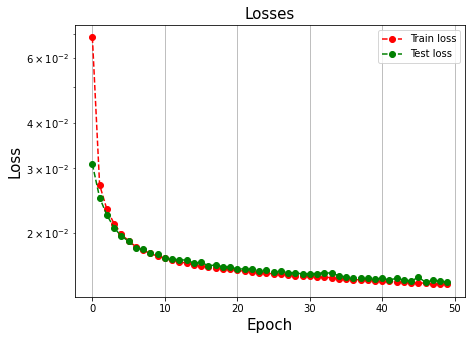

In [17]:
# Plot losses by epoch
plt.figure(figsize=(7,5))
plt.semilogy(train_loss, linestyle='--', marker='o', color='r', label='Train loss')
plt.semilogy(test_loss, linestyle='--', marker='o', color='g', label='Test loss')
plt.xlabel('Epoch',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.title("Losses",fontsize=15)
plt.grid()
plt.legend()
plt.savefig('./Img/best_model_losses.svg', format='svg')
plt.show()

# Latent space exploration

**2 pt - explore the latent space structure (e.g., PCA, t-SNE) and generate new samples from latent codes**

## Retrieve the encoded vector for each image in the test set

In [18]:
AE = model.Autoencoder(trial.params["encoded_space_dim"])

In [19]:
# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

Selected device: cpu


In [20]:
# Load network parameters
AE.encoder.load_state_dict(torch.load('Models/encoder_params.pth'))
AE.decoder.load_state_dict(torch.load('Models/decoder_params.pth'))

<All keys matched successfully>

In [21]:
### Get the encoded representation of the test samples
encoded_samples = []
for sample in tqdm(test_dataset):
    img = sample[0].unsqueeze(0).to(device)
    label = sample[1]
    # Encode image
    AE.encoder.eval()
    with torch.no_grad():
        encoded_img  = AE.encoder(img)
    # Append to list
    encoded_img = encoded_img.flatten().cpu().numpy()
    encoded_sample = {f"Enc. Variable {i}": enc for i, enc in enumerate(encoded_img)}
    encoded_sample['label'] = label
    encoded_samples.append(encoded_sample)

100%|██████████| 10000/10000 [00:04<00:00, 2343.23it/s]


In [22]:
# Convert to a dataframe
encoded_samples = pd.DataFrame(encoded_samples)
encoded_samples

Enc. Variable 0  Enc. Variable 1  Enc. Variable 2  Enc. Variable 3  \
0           10.758677         0.332387        -6.672922        -6.706815   
1          -20.671459       -19.912304       -16.510332        -7.363163   
2           -4.938234       -15.745524       -19.418179        -5.961410   
3           -7.876634        -8.965118       -16.171103        -0.948895   
4          -18.153082       -21.147690       -12.516006         1.572166   
...               ...              ...              ...              ...   
9995        10.289068        -2.536523       -12.366635       -14.940535   
9996        -7.226832        -5.167647       -10.472098        -4.431872   
9997        -6.783549       -22.067493        -3.953512         5.024181   
9998        -8.628148        -6.892390       -18.298765        -6.609016   
9999         4.126942        -3.224097        -4.293003        -4.780447   

      Enc. Variable 4  Enc. Variable 5  Enc. Variable 6  Enc. Variable 7  \
0           -8.847574        16.636463         9.228452        -3.607131   
1            9.277250        29.279577        -8.213710       -26.795296   
2            0.748647         4.054946        -4.379058        11.185637   
3            3.852969        -1.220149        -8.751285         5.905571   
4            7.826329        12.563879         7.144152        -5.849911   
...               ...              ...              ...              ...   
9995         6.107216        23.679186        14.705901        -8.787057   
9996         1.579889        -1.732412        -9.669531         3.863065   
9997         2.028081        15.561523         0.045045        10.075463   
9998        -1.201861        -6.187128        -8.937287         1.927058   
9999        -9.919260         7.477072         6.788167        -6.814245   

      Enc. Variable 8  Enc. Variable 9  label  
0           12.846194        13.622640      9  
1           19.369425       -11.626613      2  
2          -24.879330        -3.841733      1  
3          -15.467195        -1.376235      1  
4           12.987589        -6.571696      6  
...               ...              ...    ...  
9995        18.200941        16.526257      9  
9996        -8.765790        -0.504488      1  
9997        -7.006198        17.966776      8  
9998       -15.859285         4.610982      1  
9999         4.423407         6.630806      5  

[10000 rows x 11 columns]

## PCA

In [23]:
pca = PCA(n_components=2)
encoded_samples_reduced_PCA = pca.fit_transform(encoded_samples)


In [24]:
pca_df = pd.DataFrame(encoded_samples_reduced_PCA)
pca_df['label'] = encoded_samples.label 


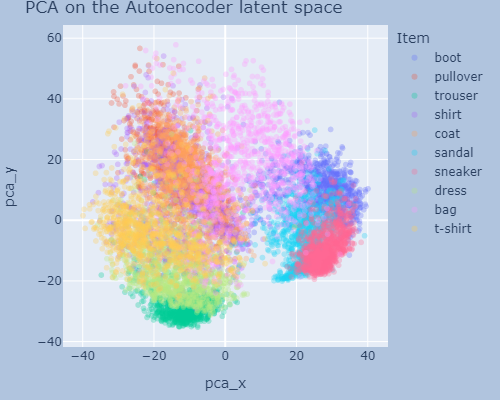

In [25]:
fig = px.scatter(pca_df, x=0, y=1, color=[label_names[l] for l in encoded_samples.label.to_numpy()],
                 opacity=0.3,
                 width=500,
                 height=400,
                 title="PCA on the Autoencoder latent space",
                labels={"0":"pca_x","1":"pca_y","color":"Item"})

fig.update_layout(
    margin=dict(l=20, r=20, t=25, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show("png")
fig.write_image("Img/CAE_PCA.svg")

## TSNE

In [26]:
tsne = TSNE(n_components=2)
encoded_samples_reduced_TSNE = tsne.fit_transform(encoded_samples)


C:\Users\hilar\anaconda3\envs\NNDL_torch\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\hilar\anaconda3\envs\NNDL_torch\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [27]:
tsne_df = pd.DataFrame(encoded_samples_reduced_TSNE)
tsne_df['label'] = encoded_samples.label 


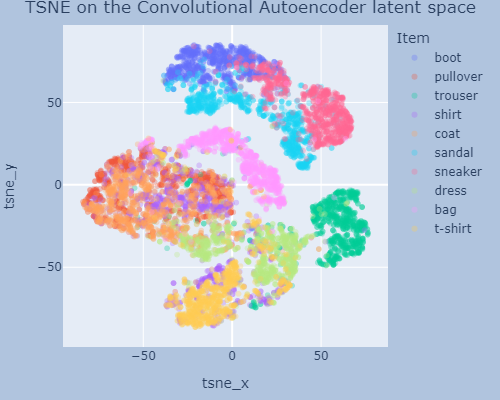

In [28]:
fig = px.scatter(tsne_df, x=0, y=1, color=[label_names[l] for l in encoded_samples.label.to_numpy()],
                 opacity=0.3,
                 width=500,
                 height=400,
                 title="TSNE on the Convolutional Autoencoder latent space",
                labels={"0":"tsne_x","1":"tsne_y","color":"Item"})

fig.update_layout(
    margin=dict(l=20, r=20, t=25, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show("png")
fig.write_image("Img/CAE_TSNE.svg")

## Sample generation

For the sample generation I will go to a model with a latent space dimension equal to two.

In [36]:
encoded_space_dim = 2
max_epochs     = 20
learning_rate  = 0.0067
regularization = 0.

In [37]:
# Initialize the autoencoder
AE_2 = model.Autoencoder(encoded_space_dim)

In [38]:
### Define the loss function for reconstruction
loss_fn = nn.MSELoss()

### Define an optimizer (both for the encoder and the decoder!)
params_to_optimize = [
    {'params': AE_2.encoder.parameters()},
    {'params': AE_2.decoder.parameters()}
]
optim = torch.optim.Adam(params_to_optimize, lr=learning_rate, weight_decay=regularization)

# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

#Send model to device
AE_2.to(device)

Selected device: cpu


Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (5): ReLU(inplace=True)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=288, out_features=64, bias=True)
    (8): ReLU(inplace=True)
    (9): Linear(in_features=64, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=64, out_features=288, bias=True)
    (3): ReLU(inplace=True)
    (4): Unflatten(dim=1, unflattened_size=(32, 3, 3))
    (5): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2))
    (6): ReLU(inplace=True)
    (7): ConvTranspose2d(16, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (8): ReLU(inplac

In [39]:
_,_ =AE_2.training_cycle(device,
                train_dataloader,
                test_dataloader,
                loss_fn,
                optim,
                max_epochs,
                test_dataset,
                2)

  0%|          | 0/20 [00:00<?, ?it/s]

EPOCH 1/20
AVERAGE TRAIN LOSS: 0.04886174947023392


  5%|▌         | 1/20 [00:18<05:47, 18.30s/it]

AVERAGE TEST LOSS: 0.03555888682603836
EPOCH 2/20
AVERAGE TRAIN LOSS: 0.03530498221516609


 10%|█         | 2/20 [00:46<07:16, 24.27s/it]

AVERAGE TEST LOSS: 0.032995037734508514
EPOCH 3/20
AVERAGE TRAIN LOSS: 0.032309405505657196


 15%|█▌        | 3/20 [01:18<07:48, 27.56s/it]

AVERAGE TEST LOSS: 0.03190305829048157
EPOCH 4/20
AVERAGE TRAIN LOSS: 0.03152428939938545


 20%|██        | 4/20 [01:45<07:20, 27.52s/it]

AVERAGE TEST LOSS: 0.03113926574587822
EPOCH 5/20
AVERAGE TRAIN LOSS: 0.03066357970237732


 25%|██▌       | 5/20 [02:26<08:07, 32.47s/it]

AVERAGE TEST LOSS: 0.03093334473669529
EPOCH 6/20
AVERAGE TRAIN LOSS: 0.03046402335166931


 30%|███       | 6/20 [02:52<07:03, 30.24s/it]

AVERAGE TEST LOSS: 0.030062317848205566
EPOCH 7/20
AVERAGE TRAIN LOSS: 0.030033454298973083


 35%|███▌      | 7/20 [03:26<06:47, 31.35s/it]

AVERAGE TEST LOSS: 0.03008067049086094
EPOCH 8/20
AVERAGE TRAIN LOSS: 0.029747625812888145


 40%|████      | 8/20 [03:55<06:05, 30.45s/it]

AVERAGE TEST LOSS: 0.03044513799250126
EPOCH 9/20
AVERAGE TRAIN LOSS: 0.02985318750143051


 45%|████▌     | 9/20 [04:28<05:44, 31.32s/it]

AVERAGE TEST LOSS: 0.029406774789094925
EPOCH 10/20
AVERAGE TRAIN LOSS: 0.02926814556121826


 50%|█████     | 10/20 [04:58<05:11, 31.11s/it]

AVERAGE TEST LOSS: 0.029293948784470558
EPOCH 11/20
AVERAGE TRAIN LOSS: 0.029220789670944214


 55%|█████▌    | 11/20 [05:30<04:41, 31.23s/it]

AVERAGE TEST LOSS: 0.02907468006014824
EPOCH 12/20
AVERAGE TRAIN LOSS: 0.029714033007621765


 60%|██████    | 12/20 [06:00<04:08, 31.03s/it]

AVERAGE TEST LOSS: 0.029255127534270287
EPOCH 13/20
AVERAGE TRAIN LOSS: 0.02904530242085457


 65%|██████▌   | 13/20 [06:31<03:36, 30.97s/it]

AVERAGE TEST LOSS: 0.030596386641263962
EPOCH 14/20
AVERAGE TRAIN LOSS: 0.02876392751932144


 70%|███████   | 14/20 [07:02<03:04, 30.76s/it]

AVERAGE TEST LOSS: 0.02873283624649048
EPOCH 15/20
AVERAGE TRAIN LOSS: 0.02904149331152439


 75%|███████▌  | 15/20 [07:33<02:35, 31.04s/it]

AVERAGE TEST LOSS: 0.028769463300704956
EPOCH 16/20
AVERAGE TRAIN LOSS: 0.028672605752944946


 80%|████████  | 16/20 [08:11<02:11, 32.95s/it]

AVERAGE TEST LOSS: 0.02941429615020752
EPOCH 17/20
AVERAGE TRAIN LOSS: 0.0287568848580122


 85%|████████▌ | 17/20 [08:50<01:45, 35.01s/it]

AVERAGE TEST LOSS: 0.028719836845993996
EPOCH 18/20
AVERAGE TRAIN LOSS: 0.02837153524160385


 90%|█████████ | 18/20 [09:26<01:10, 35.15s/it]

AVERAGE TEST LOSS: 0.028630346059799194
EPOCH 19/20
AVERAGE TRAIN LOSS: 0.028349826112389565


 95%|█████████▌| 19/20 [09:49<00:31, 31.65s/it]

AVERAGE TEST LOSS: 0.028240863233804703
EPOCH 20/20
AVERAGE TRAIN LOSS: 0.028032928705215454


100%|██████████| 20/20 [10:11<00:00, 30.57s/it]

AVERAGE TEST LOSS: 0.02813968062400818


Lets check the latent space

In [40]:
### Get the encoded representation of the test samples
encoded_samples = []
for sample in tqdm(test_dataset):
    img = sample[0].unsqueeze(0).to(device)
    label = sample[1]
    # Encode image
    AE_2.encoder.eval()
    with torch.no_grad():
        encoded_img  = AE_2.encoder(img)
    # Append to list
    encoded_img = encoded_img.flatten().cpu().numpy()
    encoded_sample = {f"Enc. Variable {i}": enc for i, enc in enumerate(encoded_img)}
    encoded_sample['label'] = label
    encoded_samples.append(encoded_sample)

100%|██████████| 10000/10000 [00:05<00:00, 1874.33it/s]


In [41]:
# Convert to a dataframe
encoded_samples = pd.DataFrame(encoded_samples)
print(min(encoded_samples["Enc. Variable 0"]), max(encoded_samples["Enc. Variable 0"]))
print(min(encoded_samples["Enc. Variable 1"]), max(encoded_samples["Enc. Variable 1"]))

-2.5518710613250732 20.09143829345703
-11.167080879211426 3.0138487815856934


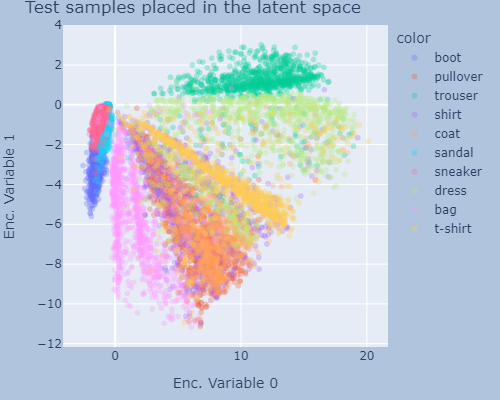

In [42]:
fig = px.scatter(encoded_samples, x='Enc. Variable 0', y='Enc. Variable 1', color=[label_names[l] for l in encoded_samples.label.to_numpy()],
                 opacity=0.3,
                 width=500,
                 height=400,
                 title="Test samples placed in the latent space")

fig.update_layout(
    margin=dict(l=20, r=20, t=25, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show("png")

In [43]:
def image_generator(x,y,decoder,device):
    decoder.to(device)
    #move the input to the GPU and predict the output
    decoder.eval()
    latent_space_vector = torch.tensor([[x,y]])
    latent_space_vector.to(device)
    with torch.no_grad():
        # Encode the data
        decoded_img   = decoder(latent_space_vector)    
    return decoded_img.squeeze().cpu().numpy()

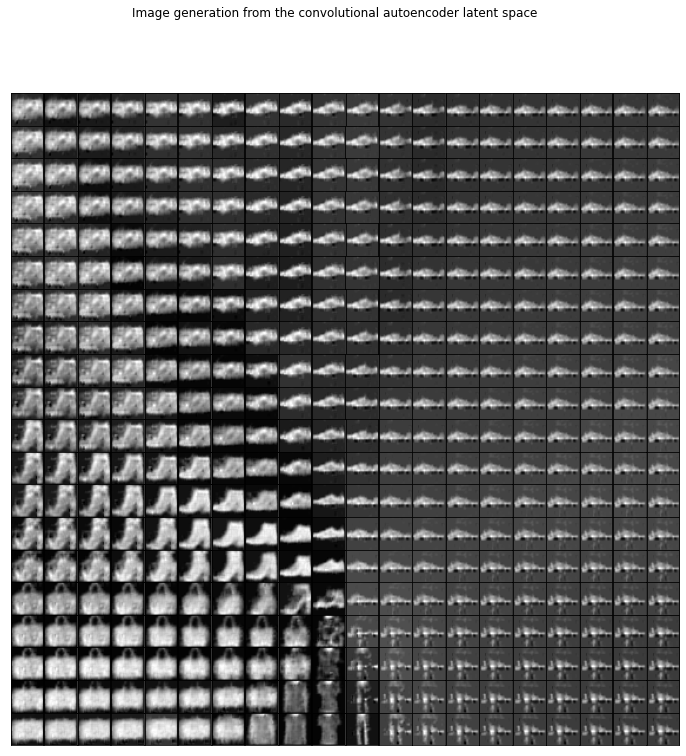

In [44]:
fig, axs = plt.subplots(20, 20, figsize=(12,12))
fig.suptitle("Image generation from the convolutional autoencoder latent space")
fig.subplots_adjust(top=0.88)
axs = axs.ravel()
X = np.linspace(-10, 2, num=20).astype(np.float32)
Y = np.linspace(-10, 10, num=20).astype(np.float32)
i = 0
for x in X:
    for y in Y: 
        img = image_generator(x,y,AE_2.decoder,device)
        axs[i].imshow(img, cmap='gist_gray')
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        i +=1
# Save figures
fig.savefig('./Img/CAE_generation.svg', format='svg')
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()
plt.close()

Autoencoders are not designed to generate data, the lack of this ability is closely related to the lack of regularity (order) in the latent space [Here there is a bit about it and why GANS are capable of doing so](https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73)

# Fine tuning - Transfer learning

**1 pt - fine-tune the (convolutional) autoencoder using a supervised classification task, and compare classification accuracy and learning speed with results achieved in Homework 1**

## Data

In [45]:
#Define a validation dataset
train_percent = 0.7
n_train      = int(train_percent * len(train_dataset))
n_validation = len(train_dataset) - n_train
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [n_train, n_validation])

print('# of training samples  :',len(train_dataset))
print('# of validation samples:',len(val_dataset))
print('# of test samples      :',len(test_dataset))


# of training samples  : 42000
# of validation samples: 18000
# of test samples      : 10000


In [46]:
batch_size = 256
train_dataloader      = DataLoader(train_dataset,  batch_size=batch_size,        shuffle=True, num_workers=0)
validation_dataloader = DataLoader(val_dataset,    batch_size=len(val_dataset),  shuffle=False, num_workers=0)
test_dataloader       = DataLoader(test_dataset,   batch_size=len(test_dataset), shuffle=False, num_workers=0)


## Transfer the autoencoder encoder weights to the supervised network

In [47]:
encoded_space_dim = trial.params["encoded_space_dim"]

In [48]:
# Initialize the old autoencoder
AE = model.Autoencoder(encoded_space_dim)
# Load network parameters
AE.encoder.load_state_dict(torch.load('./Models/encoder_params.pth'))

<All keys matched successfully>

In [49]:
#Initialize the Autoencoder for fine tuning
FTAE = model.Fine_Tuned_Autoencoder(encoded_space_dim,AE)


In [50]:
FTAE

Fine_Tuned_Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (5): ReLU(inplace=True)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=288, out_features=64, bias=True)
    (8): ReLU(inplace=True)
    (9): Linear(in_features=64, out_features=10, bias=True)
  )
  (fine_tuner): Linear(in_features=10, out_features=10, bias=True)
)

In [51]:
### Disable the weight update for the trained encoder
for param_name, param in FTAE.encoder.named_parameters():
    param.requires_grad = False

### Allow weight update (training) of the last layers (linear layers)
for param in FTAE.encoder[7].parameters():
    param.requires_grad = True
    
### Allow weight update (training) of the last layers (linear layers)
for param in FTAE.encoder[9].parameters():
    param.requires_grad = True

### Check which weights and biases will be updated
for param_name, param in FTAE.encoder.named_parameters():
    print(param_name,param.requires_grad)

0.weight False
0.bias False
2.weight False
2.bias False
4.weight False
4.bias False
7.weight True
7.bias True
9.weight True
9.bias True


In [52]:
learning_rate       = 1e-3
regularization_term = 0.
n_epochs = 50

In [53]:
### Define the loss function
loss_fn = nn.CrossEntropyLoss()

### Define an optimizer (both for the encoder and the decoder!)
params_to_optimize = [
    {'params': FTAE.encoder.parameters()},
    {'params': FTAE.fine_tuner.parameters()}
]
optim = torch.optim.Adam(params_to_optimize, lr=learning_rate, weight_decay=regularization_term)

# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

Selected device: cpu


In [54]:
train, test = FTAE.tune_training_cycle(device,
                                       train_dataloader,
                                       validation_dataloader,
                                       loss_fn,
                                       optim,
                                       n_epochs,
                                       test_dataloader,
                                      verbose=False)

100%|██████████| 50/50 [07:55<00:00,  9.52s/it]


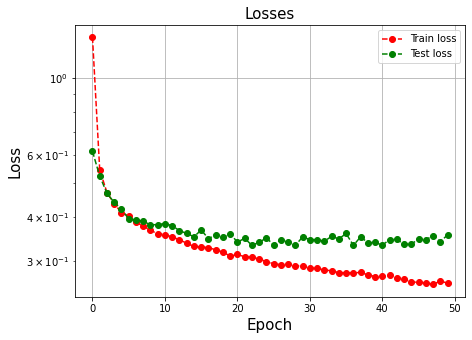

In [55]:
# Plot losses by epoch
plt.figure(figsize=(7,5))
plt.semilogy(train, linestyle='--', marker='o', color='r', label='Train loss')
plt.semilogy(test, linestyle='--', marker='o', color='g', label='Test loss')
plt.xlabel('Epoch',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.title("Losses",fontsize=15)
plt.grid()
plt.legend()
#plt.ylim(0,2)
plt.savefig('./Img/fine_tunning_losses.svg', format='svg')
plt.show()

In [56]:
test_acc = 0

y_test=[]
y_pred=[]

FTAE.to(device)

with torch.no_grad():
    for x_batched, y_batched in test_dataloader:
        # Move data to device
        x_batched = x_batched.to(device)
        y_batched = y_batched.to(device)

        # forward the data
        out = FTAE.forward(x_batched,"Test")

        y_test.append(y_batched)
        y_pred.append(out)

        pred = np.argmax(out.detach().cpu().numpy(), axis = 1)
        right = np.sum(pred == np.array(y_batched.cpu()))
        test_acc = test_acc + right

print(f"The obtained accuracy is {test_acc/len(test_dataset)*100} %")

The obtained accuracy is 86.88 %


In [59]:
def confussion_plot(real, prediction):
    categories = ['T-shirt/top','Trouser','Pullover',
                    'Dress','Coat','Sandal','Shirt',
                    'Sneaker','Bag','Ankle boot']

    array = confusion_matrix(real, prediction,normalize="true")
    df_cm = pd.DataFrame(array, index = categories, columns = categories)
    
    fig = plt.figure(figsize=(8,7))
    sns.heatmap(df_cm, annot=True, fmt='.2f')
    plt.ylabel("Correct",fontsize=15)
    plt.xlabel("Predicted",fontsize=15)
    plt.title("Confussion matrix",fontsize=15)
    plt.savefig('./Img/confussion.svg', format='svg')
    plt.show()

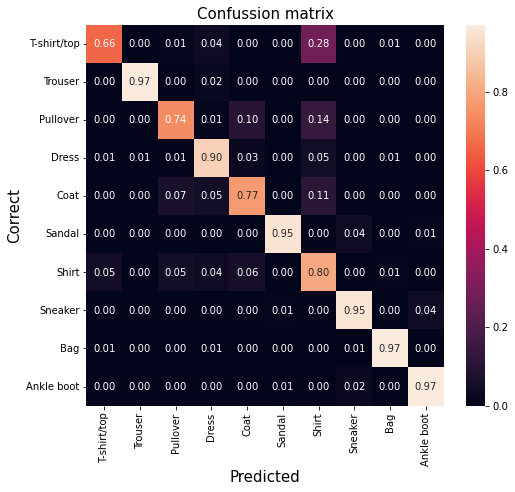

In [60]:
confussion_plot(y_batched, pred)

# Generative models


**2 pt: implement and test variational (convolutional) autoencoder or GAN or SimCLR**

## Variational Autoencoder


![LALA](./Img/variational_autoencoder.png)

[VAES by towarddatascience](https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73)

- a variational autoencoder can be defined as being an autoencoder whose training is regularised to avoid overfitting and ensure that the latent space has good properties that enable generative process.
-  instead of encoding an input as a single point, we encode it as a distribution over the latent space.
- The model is then trained as follows:

    - first, the input is encoded as distribution over the latent space

    - second, a point from the latent space is sampled from that distribution
    
    - third, the sampled point is decoded and the reconstruction error can be computed
    - finally, the reconstruction error is backpropagated through the network

[GANS by towarddatasicence](https://towardsdatascience.com/understanding-generative-adversarial-networks-gans-cd6e4651a29)

In [61]:
encoded_space_dim = 2
max_epochs     = 50
learning_rate  = 0.0067
regularization = 0.

In [62]:
# Initialize the autoencoder
VAE = model.Variational_Autoencoder(encoded_space_dim)

In [63]:
### Define the loss function for reconstruction
#loss_fn = torch.nn.MSELoss()

### Define an optimizer (both for the encoder and the decoder!)
params_to_optimize = [
    {'params': VAE.encoder.parameters()},
    {'params': VAE.decoder.parameters()}
]
optim = torch.optim.Adam(params_to_optimize, lr=learning_rate, weight_decay=regularization)

# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

Selected device: cpu


In [64]:
train, test = VAE.training_cycle(device,
                                   train_dataloader,
                                   test_dataloader,
                                   optim,
                                   max_epochs,
                                   test_dataset,
                                   verbose = False)

100%|██████████| 50/50 [14:48<00:00, 17.76s/it]


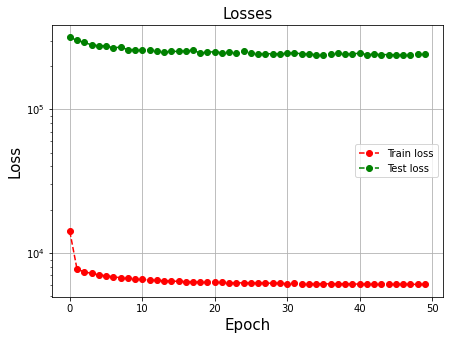

In [65]:
# Plot losses by epoch
plt.figure(figsize=(7,5))
plt.semilogy(train, linestyle='--', marker='o', color='r', label='Train loss')
plt.semilogy(test, linestyle='--', marker='o', color='g', label='Test loss')
plt.xlabel('Epoch',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.title("Losses",fontsize=15)
plt.grid()
plt.legend()
#plt.ylim(0,2)
plt.savefig('./Img/Variational_AE_losses.svg', format='svg')
plt.show()

In [66]:
### Get the encoded representation of the test samples
encoded_samples = []
for sample in tqdm(test_dataset):
    img = sample[0].unsqueeze(0).to(device)
    label = sample[1]
    # Encode image
    with torch.no_grad():
        _,latent_mn,latent_std = VAE.forward(img, "Test")
        encoded_img = VAE.sampler(latent_mn,latent_std)
    # Append to list
    encoded_img = encoded_img.flatten().cpu().numpy()
    encoded_sample = {f"Enc. Variable {i}": enc for i, enc in enumerate(encoded_img)}
    encoded_sample['label'] = label
    encoded_samples.append(encoded_sample)
    
# Convert to a dataframe
encoded_samples = pd.DataFrame(encoded_samples)

100%|██████████| 10000/10000 [00:10<00:00, 916.42it/s]


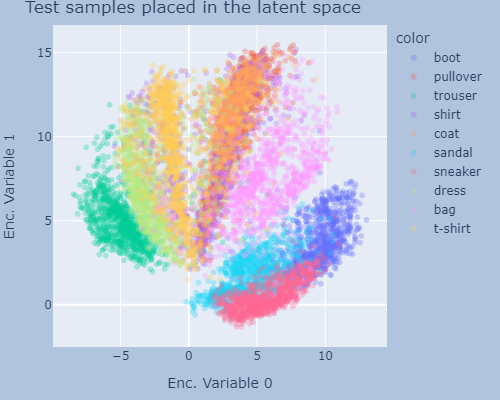

In [67]:
fig = px.scatter(encoded_samples, x='Enc. Variable 0', y='Enc. Variable 1', color=[label_names[l] for l in encoded_samples.label.to_numpy()],
                 opacity=0.3,
                 width=500,
                 height=400,
                 title="Test samples placed in the latent space")

fig.update_layout(
    margin=dict(l=20, r=20, t=25, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show("png")
fig.write_image("Img/VAE_latent_space.svg")

In [68]:
def image_generator(x,y,decoder,device):
    decoder.to(device)
    #move the input to the GPU and predict the output
    decoder.eval()
    latent_space_vector = torch.tensor([[x,y]])
    latent_space_vector.to(device)
    with torch.no_grad():
        # Encode the data
        decoded_img   = decoder(latent_space_vector)    
    return decoded_img.squeeze().cpu().numpy()

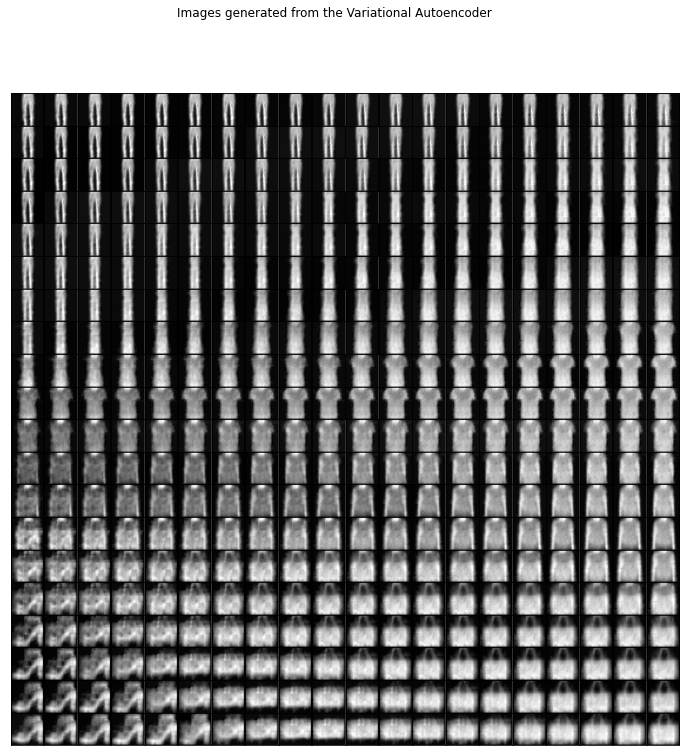

In [77]:
fig, axs = plt.subplots(20, 20, figsize=(12,12))
fig.suptitle("Images generated from the Variational Autoencoder")
fig.subplots_adjust(top=0.88)
axs = axs.ravel()
X = np.linspace(-5, 5, num=20).astype(np.float32)
Y = np.linspace(3, 7, num=20).astype(np.float32)
i = 0
for x in X:
    for y in Y: 
        img = image_generator(x,y,VAE.decoder,device)
        axs[i].imshow(img, cmap='gist_gray')
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        i +=1
# Save figures
fig.savefig('./Img/VAE_generation.svg', format='svg')
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()
plt.close()

## GAN - Generative Adversarial Network

[A bit of theory](https://towardsdatascience.com/understanding-generative-adversarial-networks-gans-cd6e4651a29) and a [bit of coding](https://towardsdatascience.com/building-a-gan-with-pytorch-237b4b07ca9a). But based on [this post](https://realpython.com/generative-adversarial-networks/#the-architecture-of-generative-adversarial-networks).

Goodfellow et al., in their original paper Generative Adversarial Networks, proposed an interesting idea: use a very well-trained classifier to distinguish between a generated image and an actual image. If such a classifier exists, we can create and train a generator network until it can output images that can completely fool the classifier.

![LALA](./Img/GAN_pipeline.jpeg)

In [6]:
batch_size =32

### Define train dataloader
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


In [7]:
class Discriminator(nn.Module):
    def __init__(self,dp=0.3):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(dp),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(dp),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(dp),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output
    
    
def sample_generator_to_train_discriminator(real_samples, device, batch_size):
    
    # Assign label 1 to real images
    real_samples = real_samples.to(device)
    real_labels  = torch.ones((batch_size,1)).to(device)
    
    # Generate some fake images
    noise_sample = torch.randn((batch_size, 100)).to(device)
    fake_samples = generator(noise_sample)
    fake_labels  = torch.zeros((batch_size, 1)).to(device)
    
    # Concatenate all the data which will serve as training dataset for the discriminator
    all_samples = torch.cat((real_samples,fake_samples))
    all_labels  = torch.cat((real_labels, fake_labels))
    
    return all_samples, all_labels,real_labels

In [8]:
learning_rate = 0.0001
regularization = 0.
num_epochs = 200


In [9]:
discriminator = Discriminator()
generator = Generator()

In [10]:
### Define the loss function
loss_fn = nn.BCELoss()

### Define an optimizer (both for the encoder and the decoder!)
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=learning_rate)
optimizer_generator     = torch.optim.Adam(generator.parameters(), lr=learning_rate)

# Check if the GPU is available
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

#Send model to device
discriminator.to(device)
generator.to(device)

Selected device: cpu


Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): ReLU()
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)

In [11]:
loss_discriminator_ = []
loss_generator_     = []

for epoch in tqdm(range(num_epochs)):
    for n, (real_samples, mnist_labels) in enumerate(train_dataloader):
        
        
        ### Data for training the discriminator
        all_samples,all_samples_labels,real_samples_labels = sample_generator_to_train_discriminator(real_samples, device, batch_size)

        
        ### Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator   = loss_fn(output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        ### Data for training the generator
        latent_space_samples = torch.randn((batch_size, 100)).to(device=device)  # Sample some noise to feed the generator

        ### Training the generator
        generator.zero_grad()
        generated_samples              = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        
        loss_generator = loss_fn(output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if n == batch_size - 1:
            loss_batch_discriminator = loss_discriminator.detach().cpu().numpy()
            loss_batch_generator = loss_generator.detach().cpu().numpy()
            loss_discriminator_.append(loss_batch_discriminator)
            loss_generator_.append(loss_batch_generator)
            #Save model
            if (epoch % 5==0):
                torch.save(generator.state_dict(), f'./Models/GAN_generator_epoch_{epoch}.pth')
                print(f"Epoch: {epoch} Loss D.: {loss_batch_discriminator}")
                print(f"Epoch: {epoch} Loss G.: {loss_batch_generator}")

  0%|                                                                                          | 0/200 [00:00<?, ?it/s]

Epoch: 0 Loss D.: 0.6928901076316833
Epoch: 0 Loss G.: 0.4795057475566864


  2%|█▉                                                                             | 5/200 [12:02<7:54:16, 145.93s/it]

Epoch: 5 Loss D.: 0.14013734459877014
Epoch: 5 Loss G.: 2.5658886432647705


  5%|███▉                                                                          | 10/200 [24:38<7:57:16, 150.72s/it]

Epoch: 10 Loss D.: 0.40220221877098083
Epoch: 10 Loss G.: 1.7448612451553345


  8%|█████▊                                                                        | 15/200 [37:10<7:43:17, 150.26s/it]

Epoch: 15 Loss D.: 0.4620330333709717
Epoch: 15 Loss G.: 1.5551127195358276


 10%|███████▊                                                                      | 20/200 [50:15<7:36:37, 152.21s/it]

Epoch: 20 Loss D.: 0.34823375940322876
Epoch: 20 Loss G.: 1.4755096435546875


 12%|█████████▌                                                                  | 25/200 [1:02:49<7:22:24, 151.68s/it]

Epoch: 25 Loss D.: 0.4246756136417389
Epoch: 25 Loss G.: 1.6859338283538818


 15%|███████████▍                                                                | 30/200 [1:15:50<7:25:17, 157.16s/it]

Epoch: 30 Loss D.: 0.42689570784568787
Epoch: 30 Loss G.: 1.6074508428573608


 18%|█████████████▎                                                              | 35/200 [1:28:08<6:49:30, 148.92s/it]

Epoch: 35 Loss D.: 0.3404289186000824
Epoch: 35 Loss G.: 1.153576374053955


 20%|███████████████▏                                                            | 40/200 [1:40:46<6:44:12, 151.58s/it]

Epoch: 40 Loss D.: 0.37816110253334045
Epoch: 40 Loss G.: 1.7084225416183472


 22%|█████████████████                                                           | 45/200 [1:54:04<6:50:30, 158.91s/it]

Epoch: 45 Loss D.: 0.385436475276947
Epoch: 45 Loss G.: 1.214661717414856


 25%|███████████████████                                                         | 50/200 [2:07:59<6:57:24, 166.96s/it]

Epoch: 50 Loss D.: 0.4562584161758423
Epoch: 50 Loss G.: 1.864416480064392


 28%|████████████████████▉                                                       | 55/200 [2:23:02<7:16:40, 180.69s/it]

Epoch: 55 Loss D.: 0.40507039427757263
Epoch: 55 Loss G.: 1.6249816417694092


 30%|██████████████████████▊                                                     | 60/200 [2:37:56<6:54:48, 177.78s/it]

Epoch: 60 Loss D.: 0.35932907462120056
Epoch: 60 Loss G.: 1.5787490606307983


 32%|████████████████████████▋                                                   | 65/200 [2:52:01<6:23:40, 170.52s/it]

Epoch: 65 Loss D.: 0.4788506329059601
Epoch: 65 Loss G.: 1.4548453092575073


 35%|██████████████████████████▌                                                 | 70/200 [3:06:09<6:09:48, 170.68s/it]

Epoch: 70 Loss D.: 0.3663240373134613
Epoch: 70 Loss G.: 1.6272192001342773


 38%|████████████████████████████▌                                               | 75/200 [3:20:34<6:00:18, 172.95s/it]

Epoch: 75 Loss D.: 0.4078994393348694
Epoch: 75 Loss G.: 1.5624650716781616


 40%|██████████████████████████████▍                                             | 80/200 [3:34:45<5:41:37, 170.82s/it]

Epoch: 80 Loss D.: 0.38133877515792847
Epoch: 80 Loss G.: 1.270695447921753


 42%|████████████████████████████████▎                                           | 85/200 [3:50:15<5:55:14, 185.34s/it]

Epoch: 85 Loss D.: 0.49815988540649414
Epoch: 85 Loss G.: 1.513077974319458


 45%|██████████████████████████████████▏                                         | 90/200 [4:04:43<5:39:58, 185.44s/it]

Epoch: 90 Loss D.: 0.401596337556839
Epoch: 90 Loss G.: 1.8500350713729858


 48%|████████████████████████████████████                                        | 95/200 [4:19:16<5:07:20, 175.63s/it]

Epoch: 95 Loss D.: 0.3844434320926666
Epoch: 95 Loss G.: 1.9611709117889404


 50%|█████████████████████████████████████▌                                     | 100/200 [4:33:59<4:53:57, 176.38s/it]

Epoch: 100 Loss D.: 0.3597579598426819
Epoch: 100 Loss G.: 1.6343910694122314


 52%|███████████████████████████████████████▍                                   | 105/200 [4:48:52<4:51:09, 183.89s/it]

Epoch: 105 Loss D.: 0.4480992257595062
Epoch: 105 Loss G.: 1.3109254837036133


 55%|█████████████████████████████████████████▎                                 | 110/200 [5:03:35<4:23:50, 175.90s/it]

Epoch: 110 Loss D.: 0.40295159816741943
Epoch: 110 Loss G.: 1.7286391258239746


 57%|███████████████████████████████████████████▏                               | 115/200 [5:18:35<4:13:19, 178.81s/it]

Epoch: 115 Loss D.: 0.31460535526275635
Epoch: 115 Loss G.: 1.4944911003112793


 60%|█████████████████████████████████████████████                              | 120/200 [5:31:57<3:32:03, 159.05s/it]

Epoch: 120 Loss D.: 0.4996550977230072
Epoch: 120 Loss G.: 1.6402913331985474


 62%|██████████████████████████████████████████████▉                            | 125/200 [5:48:13<3:53:32, 186.83s/it]

Epoch: 125 Loss D.: 0.3034213185310364
Epoch: 125 Loss G.: 1.5658897161483765


 65%|████████████████████████████████████████████████▊                          | 130/200 [6:02:33<3:23:29, 174.41s/it]

Epoch: 130 Loss D.: 0.29936718940734863
Epoch: 130 Loss G.: 1.5150660276412964


 68%|██████████████████████████████████████████████████▋                        | 135/200 [6:17:00<3:08:23, 173.91s/it]

Epoch: 135 Loss D.: 0.4761194884777069
Epoch: 135 Loss G.: 1.8155051469802856


 70%|████████████████████████████████████████████████████▌                      | 140/200 [6:31:34<2:50:41, 170.69s/it]

Epoch: 140 Loss D.: 0.36370518803596497
Epoch: 140 Loss G.: 1.6940847635269165


 72%|██████████████████████████████████████████████████████▍                    | 145/200 [6:45:20<2:38:41, 173.12s/it]

Epoch: 145 Loss D.: 0.33634766936302185
Epoch: 145 Loss G.: 1.554060459136963


 75%|████████████████████████████████████████████████████████▎                  | 150/200 [6:59:42<2:26:47, 176.16s/it]

Epoch: 150 Loss D.: 0.29738837480545044
Epoch: 150 Loss G.: 1.592291235923767


 78%|██████████████████████████████████████████████████████████▏                | 155/200 [7:14:34<2:11:05, 174.79s/it]

Epoch: 155 Loss D.: 0.4195873737335205
Epoch: 155 Loss G.: 1.9332656860351562


 80%|████████████████████████████████████████████████████████████               | 160/200 [7:28:01<1:46:02, 159.07s/it]

Epoch: 160 Loss D.: 0.31840527057647705
Epoch: 160 Loss G.: 1.895764946937561


 82%|█████████████████████████████████████████████████████████████▉             | 165/200 [7:39:55<1:25:04, 145.86s/it]

Epoch: 165 Loss D.: 0.44831112027168274
Epoch: 165 Loss G.: 1.7793071269989014


 85%|███████████████████████████████████████████████████████████████▊           | 170/200 [7:51:07<1:08:00, 136.01s/it]

Epoch: 170 Loss D.: 0.2145729959011078
Epoch: 170 Loss G.: 1.8061716556549072


 88%|█████████████████████████████████████████████████████████████████▋         | 175/200 [8:15:21<1:33:48, 225.13s/it]

Epoch: 175 Loss D.: 0.30603086948394775
Epoch: 175 Loss G.: 1.6848481893539429


 90%|███████████████████████████████████████████████████████████████████▌       | 180/200 [8:30:00<1:01:17, 183.87s/it]

Epoch: 180 Loss D.: 0.4427001476287842
Epoch: 180 Loss G.: 1.6131031513214111


 92%|███████████████████████████████████████████████████████████████████████▏     | 185/200 [8:44:27<44:04, 176.30s/it]

Epoch: 185 Loss D.: 0.3406544029712677
Epoch: 185 Loss G.: 2.1331100463867188


 95%|█████████████████████████████████████████████████████████████████████████▏   | 190/200 [8:58:48<28:11, 169.10s/it]

Epoch: 190 Loss D.: 0.3473951816558838
Epoch: 190 Loss G.: 1.7671902179718018


 98%|███████████████████████████████████████████████████████████████████████████  | 195/200 [9:10:47<12:16, 147.31s/it]

Epoch: 195 Loss D.: 0.3366374671459198
Epoch: 195 Loss G.: 1.589280128479004


100%|█████████████████████████████████████████████████████████████████████████████| 200/200 [9:24:04<00:00, 169.22s/it]


### Losses

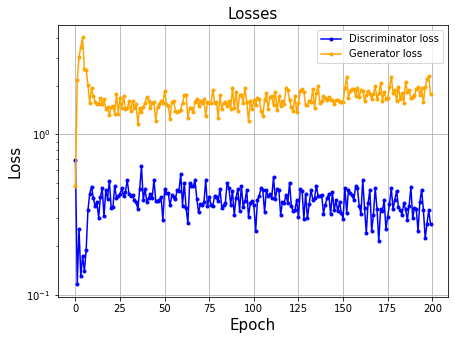

In [29]:
# Plot losses by epoch
plt.figure(figsize=(7,5))
plt.semilogy(loss_discriminator_, linestyle='-', marker='.', color='b', label='Discriminator loss')
plt.semilogy(loss_generator_, linestyle='-', marker='.', color='orange', label='Generator loss')
plt.xlabel('Epoch',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.title("Losses",fontsize=15)
plt.grid()
plt.legend()
#plt.savefig('./imgs/classification/losses.svg', format='svg')
plt.show()

### Image generation

In [1]:
import imageio
from IPython.display import Image

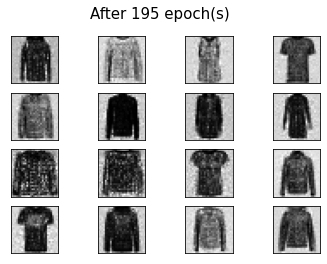

In [16]:
every_n = [i for i in range(num_epochs)]
for j in every_n[::5]:
    # Load network parameters
    generator.load_state_dict(torch.load(f'Models/GAN_generator_epoch_{j}.pth'))

    latent_space_samples = torch.randn(batch_size, 100).to(device)
    generated_samples = generator(latent_space_samples)

    generated_samples = generated_samples.cpu().detach()
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
        plt.xticks([])
        plt.yticks([])
    plt.suptitle(f'After {j} epoch(s)',fontsize=15)    
    plt.savefig(f"./Img/GAN/{j}.png")

In [2]:
# Build GIF
every_n = [i for i in range(200)]
gif_files = [f"./Img/GAN/{j}.png" for j in every_n[::5]]
with imageio.get_writer('./Img/GAN.gif', mode='I') as writer:
    for filename in gif_files:
        image = imageio.imread(filename)
        writer.append_data(image)
    
gif = imageio.mimread('./Img/GAN.gif')
gif_speed_up = './Img/GAN.gif'
imageio.mimsave(gif_speed_up, gif, fps=2)


In [3]:
Image(url='./Img/GAN.gif')  

### CGAN